In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
parent = os.path.dirname(os.path.abspath(''))
sys.path.append(parent)


import network

import gc
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
### MNIST classification

# load
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

# preprocess
X   = train.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01
X_t = test.iloc[:, 1:].to_numpy(np.float32) / 255.0 * 0.99 + 0.01

# one hot encode
# np.eye() creates an identity matrix
# we then create the one hot matrix by referencing every element
y   = np.eye(10)[train.iloc[:,0].to_numpy((int))]
y_t = np.eye(10)[test.iloc[:,0].to_numpy((int))]
y_true = np.argmax(y_t, axis=1)

del test, train
gc.collect()

0

In [3]:
X = X.reshape(-1,28,28)
X_t = X_t.reshape(-1, 28, 28)

In [4]:
X_t.shape

(10000, 28, 28)

In [25]:
image = X_t[0][::2,::2]

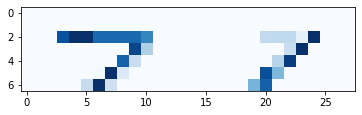

In [26]:
import matplotlib as plt
plt.pyplot.imshow(image.reshape(7, -1), cmap = plt.pyplot.get_cmap('Blues'))

In [18]:
# define network
nn = network.NeuralNetwork([
                    network.Conv1d_layer(28, 8, 8),
                    network.Flatten_layer(),
    
                    network.Linear_layer(168, 10, bias=None),
                    network.Activation_layer('fast_softmax')
                    ])
param = {"lr": 1e-4, 'batch': 16, "mode": "train", "eps": 1e-9, "beta":(0.9, 0.999), 
         "epoch": 0, 'optimizer': 'Adam', 't': 1, 'clip': 1.0, 'decay': 0.0}

In [20]:
for i in range(50):
    nn.train(X[:10000], y[:10000], param, loss_func='fast_cross_entropy')
    yhat = nn(X_t, mode='classification')
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 14.380426, elapsed time = 25.613030672073364.
Epoch 0, Performance = 72.54
Average loss = 13.386456, elapsed time = 25.80136728286743.
Epoch 1, Performance = 74.0
Average loss = 12.655714, elapsed time = 25.084737062454224.
Epoch 2, Performance = 75.48
Average loss = 12.110813, elapsed time = 25.91892647743225.
Epoch 3, Performance = 76.34
Average loss = 11.672580, elapsed time = 25.09807014465332.
Epoch 4, Performance = 77.14999999999999
Average loss = 11.324829, elapsed time = 25.484854698181152.
Epoch 5, Performance = 77.81
Average loss = 11.034026, elapsed time = 26.01435422897339.
Epoch 6, Performance = 78.31
Average loss = 10.804274, elapsed time = 26.181746244430542.
Epoch 7, Performance = 78.66
Average loss = 10.608437, elapsed time = 25.10617971420288.
Epoch 8, Performance = 78.92
Average loss = 10.441172, elapsed time = 25.279813766479492.
Epoch 9, Performance = 79.21000000000001
Average loss = 10.303627, elapsed time = 26.72248673439026.
Epoch 10, Performance 

0

In [17]:
for i in range(5):
    nn.train(X[:10000], y[:10000], param, loss_func='fast_cross_entropy')
    yhat = nn(X_t, mode='classification')
    accuracy = accuracy_score(y_true, yhat) * 100
    print(f"Epoch {i}, Performance = {accuracy}")
    param['lr'] *= 0.9
gc.collect()

Average loss = 20.157538, elapsed time = 25.863327741622925.
Epoch 0, Performance = 80.51
Average loss = 8.904244, elapsed time = 24.671323776245117.
Epoch 1, Performance = 83.02000000000001
Average loss = 7.717095, elapsed time = 25.293291091918945.
Epoch 2, Performance = 85.28
Average loss = 7.069407, elapsed time = 25.562554836273193.
Epoch 3, Performance = 85.85000000000001
Average loss = 6.766947, elapsed time = 26.296876668930054.
Epoch 4, Performance = 86.53


66

In [7]:
yhat = nn(X_t, mode="classification")